<h1><center>  Unsupervised Learning algorithms and Topic Modeling</center>
    
<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\

```Image source: https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [3]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np # matrix calculation
import pandas as pd #import data nicely 
import matplotlib.pyplot as plt # plot things nicely 
from collections import Counter # not a default function but very useful - counter



## Dataset
> Collaborative problem solving (CPS) Data (Polyak et al., 2017).\
> *“a sample of middle school children who interacted with a game-like, online simulation of collaborative problem-solving tasks.”*

---
#### Collaborative Problem Solving Variables

| Variable            | 
|-----------------------------|
| Feture Identification (FI)                 | 
| Maintaining a Shared Understanding (MU)                     | 
| Engagement/Interaction (EN)           | 
| Strategy (S) | 
| Evaluate (EV)             | 




In [11]:
df = pd.read_csv('train_rel_2.tsv', sep='\t')
df = df[df['EssaySet'] == 10]
response = df.EssayText.apply(lambda x: x.split('::')[1])
response

15403     black might affect the dog house because then...
15404     White because you wouldn't want the dog to ge...
15405     the color white will reflect the suns rays of...
15406     this color will keep the dog house cooler ins...
15407     I would use a light color like White in this ...
                               ...                        
17038     white becuase if you live in a hot place the ...
17039     This color will affect the doghouse for the b...
17040     i think light gray would work the best becaus...
17041      if they painted the doghouse dark gray, then...
17042     the black would affect the doghouse because t...
Name: EssayText, Length: 1640, dtype: object

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: Clustering
 > Let's conduct clustering analysis with our `response` dataset.
 
 > Remember we learned several variations of clustering algorithms -- K-means, Hiearchical clustering..\
 > We can do the analysis simply using `sklearn.cluster`. In order to call the algorithms\
 > `from sklearn.cluster import KMeans` and `from sklearn.cluster import AgglomerativeClustering`

### Kmeans Clustering 

Counter({1: 983, 0: 537, 2: 120})


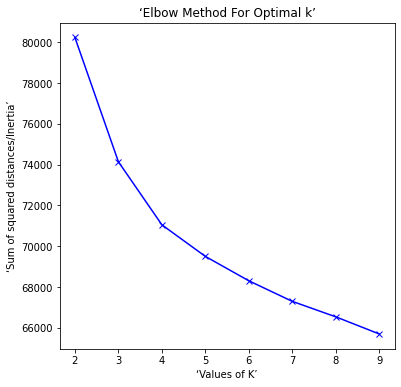

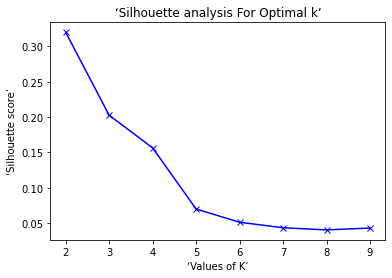

Counter({0: 983, 1: 537, 2: 120})


NameError: ignored

In [29]:
import matplotlib.pyplot as plt # this is to plot our results 
from sklearn.cluster import KMeans # kmeans algorithm 

%matplotlib inline
plt.figure(figsize=(6, 6)) # setting the plot resolutions 

################ What was our CPS data called?


# STEP 1: VECTORIZATION 
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer()
data = cv.fit_transform(response)


# STEP 2: CLUSTERING WITH KMEANS 
kmeans= KMeans(n_clusters=3).fit(data)              
kmeans_labels = kmeans.labels_
print(Counter(kmeans_labels))

###### How do we find the best k ? 

silhouette_avg = [] #silhouette score
Sum_of_squared_distances = [] #sum of square distance 
K = range(2,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_

  Sum_of_squared_distances.append(kmeans.inertia_)
  from sklearn.metrics import silhouette_score
  silhouette_avg.append(silhouette_score(data, cluster_labels))

 # sum of square distance 
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("‘Values of K’") 
plt.ylabel("‘Sum of squared distances/Inertia’") 
plt.title("‘Elbow Method For Optimal k’")
plt.show()

 # silhouette score
plt.plot(K,silhouette_avg, "bx-")
plt.xlabel("‘Values of K’") 
plt.ylabel("‘Silhouette score’") 
plt.title("‘Silhouette analysis For Optimal k’")
plt.show()

# STEP 3: Final Clustering Decision 

kmeans= KMeans(n_clusters=3).fit(data)              
kmeans_labels = kmeans.labels_
print(Counter(kmeans_labels))

################ How do we extract a feature matrix from a pandas dataframe? 
'''
data.columns = ['FI','MU','EM', 'EV', 'S']
kmeans = KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
print(Counter(kmeans.labels_))

color_theme = np.array(['red','green','blue'])

plt.scatter(x=data.FI, y=data.EM, 
            c=color_theme[kmeans.labels_], s=30)
plt.xlabel(data.columns[0], fontsize=12)
plt.ylabel(data.columns[2], fontsize=12)
plt.show()
'''

kmeans_labels

### Hierarchical Clustering

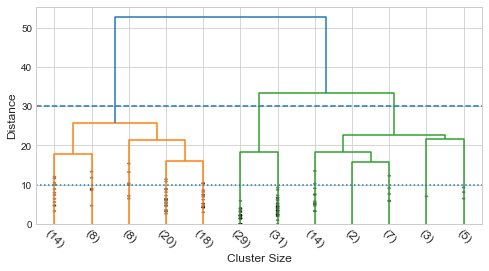

In [ ]:
import matplotlib.pyplot as plt # this is to plot our results 
from scipy.cluster.hierarchy import dendrogram, linkage # this is to define a linkage method
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 4))

################ Let's define a linkage method 


Z = linkage(data, 'average') 

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=-45.,
           leaf_font_size=12., show_contracted=True)

plt.xlabel('Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=30, linestyle='dashed')
plt.axhline(y=10, linestyle='dotted')
plt.show()




In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') #FIT AND LEARN MODEL 
ac_labels = cluster.fit_predict(data)
ac_labels

array([1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2])

### Let's compare the model results 
> explore! `kmeans_labels`, `ac_labels`, and `dbscan_labels`\
> Let's try to put them into a dataframe.


In [ ]:
result = pd.DataFrame(list(zip(kmeans_labels, ac_labels)))
result.columns = ['KC', 'HC']

In [ ]:
pd.crosstab(result['KC'], result.HC)

HC,0,1,2
KC,,,
0,0,7,60
1,30,24,0
2,38,0,0


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 3: Topic Modeling: LDA 
 > Let's conduct a topic modeling analysis with our CPS dataset.
 

In [40]:
import nltk 
nltk.download('punkt')
data_words = response.apply(nltk.word_tokenize)
data_words

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 1), (21, 1)]


In [42]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.084*"the" + 0.035*"," + 0.034*"." + 0.022*"dog" + 0.022*"be" + 0.019*"to" '
  '+ 0.019*"color" + 0.018*"and" + 0.018*"would" + 0.016*"because"'),
 (1,
  '0.072*"the" + 0.042*"(" + 0.042*")" + 0.032*"DEG" + 0.025*"." + 0.019*"C" + '
  '0.017*"dog" + 0.017*"to" + 0.016*"," + 0.016*"a"'),
 (2,
  '0.118*"the" + 0.034*"." + 0.033*"it" + 0.025*"white" + 0.022*"color" + '
  '0.022*"dog" + 0.017*"would" + 0.017*"in" + 0.016*"to" + 0.015*"doghouse"'),
 (3,
  '0.066*"the" + 0.036*"." + 0.025*"it" + 0.025*"DEG" + 0.024*")" + 0.023*"(" '
  '+ 0.022*"," + 0.022*"be" + 0.018*"would" + 0.016*"black"'),
 (4,
  '0.074*"the" + 0.027*"." + 0.026*"would" + 0.024*"," + 0.023*"doghouse" + '
  '0.022*"white" + 0.022*"be" + 0.018*"and" + 0.018*"black" + 0.018*"it"'),
 (5,
  '0.084*"the" + 0.031*")" + 0.030*"." + 0.030*"," + 0.027*"DEG" + 0.026*"(" + '
  '0.024*"white" + 0.017*"it" + 0.016*"C" + 0.015*"was"'),
 (6,
  '0.074*"the" + 0.028*"because" + 0.028*"." + 0.026*"a" + 0.021*"dog" + '
  '0.020*"w

In [50]:
!pip install pyLDAvis #this is for visualization (interactive)
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared =  pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.011284  0.009934       1        1  24.933526
3      0.011927  0.006385       2        1  15.654929
5      0.032756  0.001916       3        1  12.274331
8      0.008202 -0.001321       4        1  11.569733
0     -0.027574 -0.005665       5        1  10.614751
7     -0.034496  0.030586       6        1  10.230902
1      0.061583 -0.007251       7        1   6.386069
9      0.004201  0.011778       8        1   3.899946
6     -0.016346 -0.005001       9        1   2.252622
4     -0.028969 -0.041362      10        1   2.183192, topic_info=            Term         Freq        Total Category  logprob  loglift
17           the  6598.000000  6598.000000  Default  30.0000  30.0000
143            )  1222.000000  1222.000000  Default  29.0000  29.0000
142            (  1203.000000  1203.000000  Default  28.0000  28.0000
29             ,  1513.000000  1513.000000  Default  27.0000  27.0000
5            dog  1407.000000  1407.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
20            to    13.618158  1023.294210  Topic10  -4.7564  -0.4950
158  temperature    10.303123   621.947805  Topic10  -5.0353  -0.2760
143            )    12.672058  1222.617503  Topic10  -4.8284  -0.7450
51           was    10.810956   732.387931  Topic10  -4.9872  -0.3914
142            (    10.769473  1203.547227  Topic10  -4.9911  -0.8919

[760 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2380      1  0.531522    $
2380      4  0.088587    $
2380      5  0.354348    $
1265      1  0.084576    &
1265      2  0.422878    &
...     ...       ...  ...
28        7  0.030241  you
28        8  0.040322  you
28        9  0.030241  you
28       10  0.060482  you
1779      9  0.640606   yu

[1583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 9, 1, 8, 2, 10, 7, 5])